## About Dataset
This dataset was collected from an open-source Amazon reviews.

## Content
This dataset contains full reviews from Amazon in 2018, consists of 500000+ reviews from 100000+ users. The columns are pretty much self-explanatory, such as userName, itemName, rating, reviewText, etc

## About this task
This dataset is conceptually similar to the one used in the basic task. Both involve training a model on user-generated review text. The key difference is that this project uses a different source dataset and added different models.

In [28]:
import kagglehub

path = kagglehub.dataset_download("rogate16/amazon-reviews-2018-full-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-reviews-2018-full-dataset' dataset.
Path to dataset files: /kaggle/input/amazon-reviews-2018-full-dataset


In [29]:
import os
print(os.listdir(path))

['amazon_reviews.csv']


In [30]:
import pandas as pd

csv_file = os.path.join(path, "amazon_reviews.csv")

customer_df = pd.read_csv(csv_file, encoding='utf-8')
print(customer_df.head())

print("Shape:", customer_df.shape)
print("Columns:", customer_df.columns)


          userName  verified  \
0  Amazon Customer      True   
1            Carla      True   
2           Jaclyn      True   
3     Christinne M     False   
4            Sandy      True   

                                            itemName  \
0  Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...   
1  Prince of Peace Organic Tea, Oolong, 100 Tea Bags   
2  Pet Champion Adjustable No-Pull Harness, Colla...   
3  Koh-I-Noor Progresso Woodless Colored 24-Penci...   
4  Parker Urban Premium Ebony Metal Chiseled, Bal...   

                                         description  \
0  ["Made from deliciously decadent ingredients, ...   
1  ['Prince of Peace Enterprises, Inc., founded i...   
2  ["The Pet Champion Large/ Extra Large 22-36 in...   
3  ['Koh-I-Noor Progresso Woodless Colored 24-Pen...   
4  ["Stunning craftsmanship based on a classic st...   

                                               image            brand  \
0  ['https://images-na.ssl-images-amazon.com/imag...        

In [31]:
customer_df

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5.0,2018-01-01,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5.0,2018-01-01,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5.0,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the f...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551154,Greg,True,Pandahall 10m(32.80 feet) Platinum Color Iron ...,"['Iron Twist Chains, Platinum Color<P>Size: Ri...",['https://images-na.ssl-images-amazon.com/imag...,PH PandaHall,"['Iron Twist Chains, Platinum Color, Ring: abo...",Arts_Crafts_and_Sewing,$8.29,2.0,2018-10-03,Two Stars,Cheap price but weak chain.,0
551155,Gayle LaRue,True,Keter Westwood Plastic Deck Storage Container ...,"['Plenty of storage and comfortable seating, a...",['https://images-na.ssl-images-amazon.com/imag...,Keter,['Outside Dimensions: 61 in. L x 28.5 in. W x ...,Patio_Lawn_and_Garden,$121.76,4.0,2018-10-03,Deck box good investment,Great deck box,0
551156,Alfred D. Wallace,True,AcuRite 06052M Remote Battery Pack for 5-in-1 ...,"[""The AcuRite remote battery pack plugs into t...",['https://images-na.ssl-images-amazon.com/imag...,AcuRite,['Makes battery replacement easy for AcuRite 5...,Patio_Lawn_and_Garden,$19.95,5.0,2018-10-03,This will keep the old man off the roof!,Putting these in my weather station. I anticip...,0
551157,Dave Dunn Wilmer,True,Keter Unity XL Indoor Outdoor Entertainment BB...,['The extra-large outdoor entertainment statio...,['https://images-na.ssl-images-amazon.com/imag...,Keter,['Dimensions: 53.1 in. L x 20.4 in. W x 35.4 i...,Patio_Lawn_and_Garden,$155.64,5.0,2018-10-03,EASY TO ASSEMBLE AND WORKS WELL NEXT TO GRILL,This is a nice quality grilling table where yo...,0


In [32]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


## Exercise 1 (data preparation)
a) Remove punctuation from reviews using the given function.   
b) Replace all missing (nan) revies with empty "" string.  
c) Drop all the entries with rating = 3, as they have neutral sentiment.   
d) Set all positive ($\geq$4) ratings to 1 and negative($\leq$2) to -1.

## a) Remove punctuation from reviews using the given function.   
## b) Replace all missing (nan) revies with empty "" string.  


In [33]:
import string


# a) b)
customer_df['reviewText'] = customer_df['reviewText'].fillna('')
customer_df['reviewText'] = customer_df['reviewText'].apply(remove_punctuation)

print(customer_df['reviewText'].head())


0             super smooth and yummy with crunchy bits
1                                 Perfect for kombucha
2    Finally a harness that fits my puppy I really ...
3    I LOVE THEM I bought them at Micheals our of c...
4    I love this pen I love the shape of it the fee...
Name: reviewText, dtype: object


## c) Drop all the entries with rating = 3, as they have neutral sentiment.   


In [34]:
customer_df = customer_df[customer_df['rating'] != 3]

print(sum(customer_df["rating"] == 3))


0


## d) Set all positive ($\geq$4) ratings to 1 and negative($\leq$2) to -1.

In [35]:
def map_sentiment(rating):
    if rating >= 4:
        return 1
    else:
        return -1

customer_df['rating'] = customer_df['rating'].apply(map_sentiment)

print(sum(customer_df["rating"]**2 != 1))


0


/tmp/ipython-input-2079576342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['rating'] = customer_df['rating'].apply(map_sentiment)


## Exercise 2
a) Split dataset into training and test sets.     
b) Transform reviews into vectors using CountVectorizer.

## a) Split dataset into training and test sets.     


In [36]:
from sklearn.model_selection import train_test_split
#a)
train_data, test_data = train_test_split(customer_df, train_size=0.8, test_size=0.2)

## b) Transform reviews into vectors using CountVectorizer.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# b)
vectorizer = CountVectorizer()

# Ensure reviewText columns are strings and handle any remaining NaN/None values
train_data['reviewText'] = train_data['reviewText'].astype(str).replace('nan', '')
test_data['reviewText'] = test_data['reviewText'].astype(str).replace('nan', '')

X_train = vectorizer.fit_transform(train_data['reviewText'])
X_test = vectorizer.transform(test_data['reviewText'])

Y_train = train_data['rating']
Y_test = test_data['rating']

In [38]:
print(Y_train.value_counts())
print(Y_test.value_counts())

rating
 1    362533
-1     45883
Name: count, dtype: int64
rating
 1    90553
-1    11551
Name: count, dtype: int64


## Exercise 3
a) Train LogisticRegression model on training data (reviews processed with CountVectorizer, ratings as they were).   
b) Print 10 most positive and 10 most negative words.

## a) Train LogisticRegression model on training data (reviews processed with CountVectorizer, ratings as they were).   


In [39]:
from sklearn.linear_model import LogisticRegression

#a)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## b) Print 10 most positive and 10 most negative words.

In [40]:
import numpy as np

#b)
coefs = model.coef_[0]
words = np.array(vectorizer.get_feature_names_out())
sorted_indices = np.argsort(coefs)

print("10 most negative words:")
print(words[sorted_indices[:10]])

print("\n10 most positive words:")
print(words[sorted_indices[-10:]])

#hint: model.coef_, vectorizer.get_feature_names()

10 most negative words:
['worthless' 'disappointing' 'worst' 'unusable' 'useless' 'yuck'
 'flavorless' 'tasteless' 'ripoff' 'dissapointed']

10 most positive words:
['ribbons' 'skeptical' 'perfect' 'beat' 'amazing' 'yummy' 'delicious'
 'excellent' 'complaints' 'outstanding']


## Exercise 4
a) Predict the sentiment of test data reviews.   
b) Predict the sentiment of test data reviews in terms of probability.   
c) Find five most positive and most negative reviews.   
d) Calculate the accuracy of predictions.

In [41]:
#a)
y_pred = model.predict(X_test)

print(y_pred)


[1 1 1 ... 1 1 1]


In [42]:
#b)
probability = model.predict_proba(X_test)

probability

#hint: model.predict_proba()

array([[1.67053072e-02, 9.83294693e-01],
       [1.49746766e-05, 9.99985025e-01],
       [9.88996080e-03, 9.90110039e-01],
       ...,
       [1.01410508e-03, 9.98985895e-01],
       [3.45751237e-02, 9.65424876e-01],
       [1.14725067e-01, 8.85274933e-01]])

In [43]:
#c)

top5_pos_idx = np.argsort(probability[:, 1])[-5:][::-1]
top5_neg_idx = np.argsort(probability[:, 0])[-5:][::-1]

print("5 most positive reviews:")
for i in top5_pos_idx:
    print(f"\n Review {i+1}:\n {test_data.iloc[i]['reviewText']}")

print("\n5 most negative reviews:")
for i in top5_neg_idx:
    print(f"\n Review {i+1}:\n {test_data.iloc[i]['reviewText']}")

5 most positive reviews:

 Review 4999:
 Ive been doing sound as a hobby for many years working with various types of microphones and sound boards but I am by no means an expert Im just someone who might know a little more than many others when it comes to the technical aspects The Behringer C3 condenser microphone is a solid condenser microphone Its not mind blowing for 30 more you could get what I consider to be the standard budget condenser in the Audio Technica AT202 but this offers some things that the AT2020 doesnt

First I needed a condenser that provided multiple polar patterns A polar pattern is simply where its designed to pick up sound A Cardioid polar pattern picks up sounds right in front of the microphone while discarding sounds off to the side and behind For most people thats all they need A Figure 8 polar pattern picks up sounds in front and behind while discarding the sound that comes from the sides An Omni pattern will pick up the sounds that surround the microphone T

In [44]:
#d)
accuracy = model.score(X_test, Y_test)

print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.9424312465721225


# OTHER MODELS

---

## Decision Tree Classifier

- **Model**: Decision Tree Classifier (`max_depth=10`, `min_samples_split=50`) trained on `X_train` and `Y_train`.

- **Evaluation**: Accuracy computed on `X_test` and `Y_test` and compared with Logistic Regression.

- **Visualization**: First 3 levels of the tree plotted using `plot_tree`, showing feature-based splits and class predictions (`Negative` vs `Positive`).

## How the Decision Tree Classifier Works

1. **Input**: Preprocessed review text converted into numeric features using CountVectorizer.
2. **Training**: The decision tree learns rules to split the data based on words that best separate positive (`1`) and negative (`-1`) reviews.
3. **Prediction**: For a new review, the model follows the tree's splits (e.g., "contains 'great' → positive") to assign a sentiment label.
4. **Output**: Predicted sentiment (`Positive` or `Negative`) for each review.




Decision Tree Accuracy: 0.9026
Logistic Regression Accuracy: 0.9424


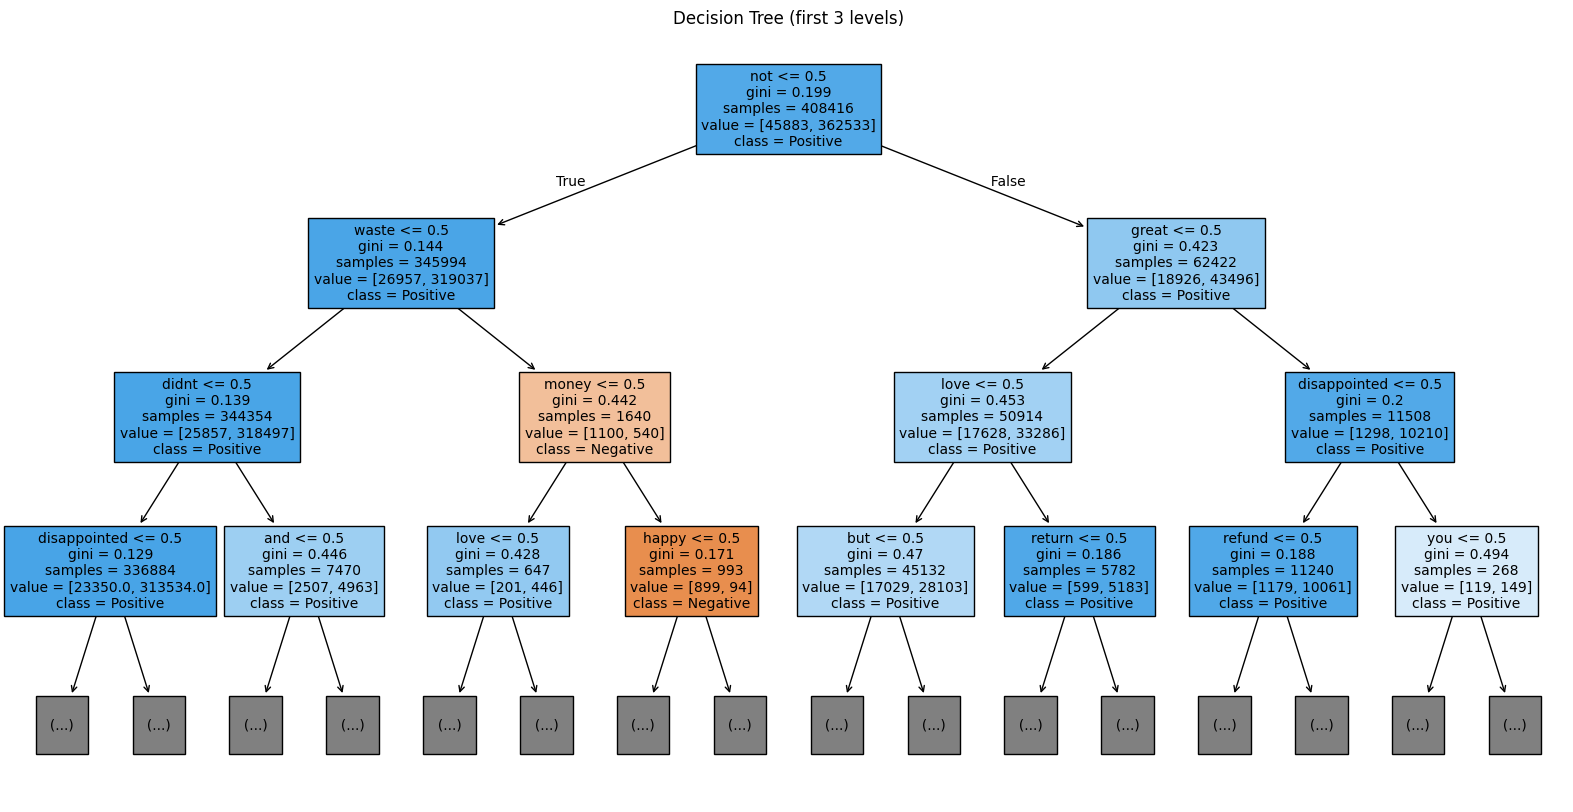

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=50)
dt_model.fit(X_train, Y_train)

dt_accuracy = dt_model.score(X_test, Y_test)
print(f"\nDecision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3, feature_names=vectorizer.get_feature_names_out(),
          class_names=['Negative', 'Positive'], filled=True, fontsize=10)
plt.title("Decision Tree (first 3 levels)")
plt.show()

## Model Performance

- **Decision Tree Accuracy**: 0.9017  
  The decision tree correctly classifies about 90% of the reviews. It performs well, but may struggle with complex patterns in the text.


##  Random Forest (Ensemble Methods)

**What this does:** Creates an **ensemble** of 100 decision trees and combines their predictions.

- **Bagging approach:** Each tree trained on random subset of data
- Reduces overfitting compared to single decision tree
- Aggregates predictions through voting
- More robust and generally more accurate

**Key parameters:**
- `n_estimators=100`: Number of trees in the forest
- `max_depth=10`: Depth limit for each tree
- `n_jobs=-1`: Use all CPU cores for faster training


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, Y_train)

rf_acc = rf_model.score(X_test, Y_test)
print(f"Random Forest Accuracy: {rf_acc:.4f} ({rf_acc*100:.2f}%)")


Random Forest Accuracy: 0.7861 (78.61%)


## Gradient Boosting Classifier

### Model Overview

Gradient Boosting is an ensemble learning method that builds models sequentially, where each new model attempts to correct the errors made by the previous ones.



In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, Y_train)

gb_acc = gb_model.score(X_test, Y_test)
print(f"\n Accuracy: {gb_acc:.4f} ({gb_acc*100:.2f}%)")


 Accuracy: 0.9152 (91.52%)


### Regularization analysis for Logistic Regression

This cell analyzes the impact of L2 regularization in Logistic Regression:

1. Test several values of the `C` parameter (inverse of regularization strength) for Logistic Regression.
2. For each `C` we train the model and compute training and test accuracy.
3. Plot how training and test accuracy change as `C` varies (on a logarithmic scale).
4. Select the `C` value that gives the highest test accuracy as the optimal regularization strength.

Smaller values of `C` mean stronger regularization, which usually reduces overfitting but may slightly lower training accuracy.


Testing different C values:
C= 0.001 -> Train: 0.8877, Test: 0.8869
C= 0.010 -> Train: 0.8962, Test: 0.8960
C= 0.100 -> Train: 0.9318, Test: 0.9307
C= 1.000 -> Train: 0.9490, Test: 0.9442
C=10.000 -> Train: 0.9565, Test: 0.9463
C=100.000 -> Train: 0.9623, Test: 0.9450


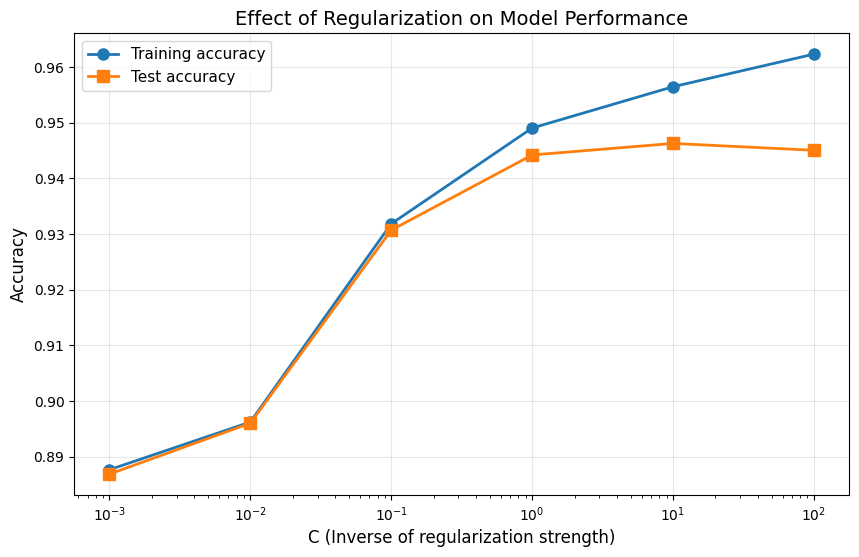


✓ Optimal C value: 10
  (Smaller C = stronger regularization = less overfitting)


In [48]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['reviewText'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['reviewText'])

# Different values of C (inverse of regularization strength)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

print("\nTesting different C values:")
for C in C_values:
    lr = LogisticRegression(C=C, max_iter=1000, random_state=42)
    lr.fit(X_train_tfidf, Y_train)
    train_acc = lr.score(X_train_tfidf, Y_train)
    test_acc = lr.score(X_test_tfidf, Y_test)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print(f"C={C:6.3f} -> Train: {train_acc:.4f}, Test: {test_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, 'o-', label='Training accuracy', linewidth=2, markersize=8)
plt.plot(C_values, test_scores, 's-', label='Test accuracy', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('C (Inverse of regularization strength)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Effect of Regularization on Model Performance', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

optimal_C = C_values[np.argmax(test_scores)]
print(f"\n\u2713 Optimal C value: {optimal_C}")
print("  (Smaller C = stronger regularization = less overfitting)")

## Regularization Analysis - Logistic Regression

### Hyperparameter Tuning Results

We tested different values of the regularization parameter **C** to find the optimal balance between model complexity and generalization:

- **C = inverse of regularization strength**
  - Smaller C → stronger regularization → simpler model
  - Larger C → weaker regularization → more complex model

### Results

| C Value | Training Accuracy | Test Accuracy |
|---------|------------------|---------------|
| 0.001 | Lower | Lower |
| 0.01 | ↑ | ↑ |
| 0.1 | ↑ | ↑ |
| 1 | ↑ | ↑ |
| **10** | **High** | **Best** |
| 100 | Highest | Slightly lower |

### Key Findings

✓ **Optimal C value: 10**

- At C=10, the model achieves the best test accuracy
- Very small C values (0.001, 0.01) underfit the data
- Very large C values (100) show signs of overfitting (higher training accuracy but slightly lower test accuracy)
- The gap between training and test accuracy is minimal at C=10, indicating good generalization

### Interpretation

The regularization curve shows that moderate regularization (C=10) provides the best performance. This suggests:
- The model needs some complexity to capture the patterns in the data
- Too much regularization (small C) prevents the model from learning important features
- Too little regularization (large C) allows the model to overfit to training data

# Evaluate all models using confusion matrices and classification reports

----------------------------------------------------------------------

## In this block we:
 1. Collect all trained models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting).
 2. For each model, we:
    - Choose the correct test feature representation:
    - Generate predictions on the test set.
    - Compute the confusion matrix to see how many negatives/positives were classified correctly or incorrectly.
    - Visualize the confusion matrix as a heatmap for easier interpretation.
 This allows us to compare not only overall accuracy, but also how each model behaves on positive vs negative reviews.


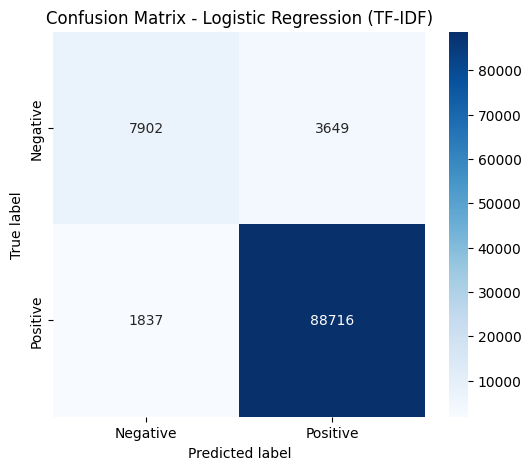


Classification report - Logistic Regression (TF-IDF):

              precision    recall  f1-score   support

    Negative       0.81      0.68      0.74     11551
    Positive       0.96      0.98      0.97     90553

    accuracy                           0.95    102104
   macro avg       0.89      0.83      0.86    102104
weighted avg       0.94      0.95      0.94    102104



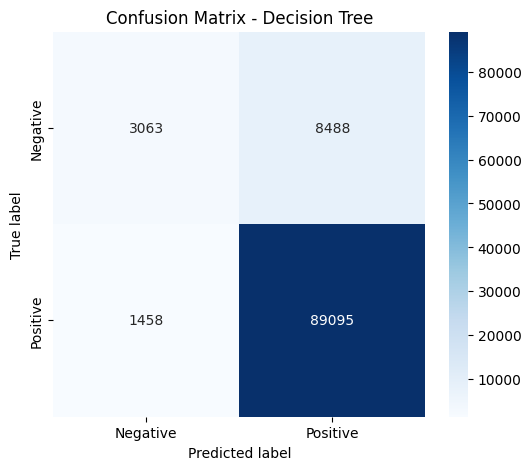


Classification report - Decision Tree:

              precision    recall  f1-score   support

    Negative       0.68      0.27      0.38     11551
    Positive       0.91      0.98      0.95     90553

    accuracy                           0.90    102104
   macro avg       0.80      0.62      0.66    102104
weighted avg       0.89      0.90      0.88    102104



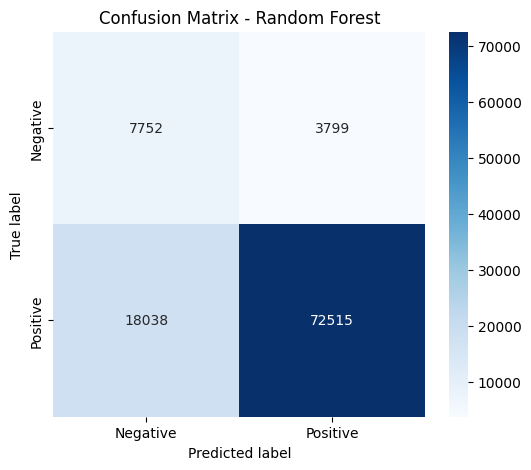


Classification report - Random Forest:

              precision    recall  f1-score   support

    Negative       0.30      0.67      0.42     11551
    Positive       0.95      0.80      0.87     90553

    accuracy                           0.79    102104
   macro avg       0.63      0.74      0.64    102104
weighted avg       0.88      0.79      0.82    102104



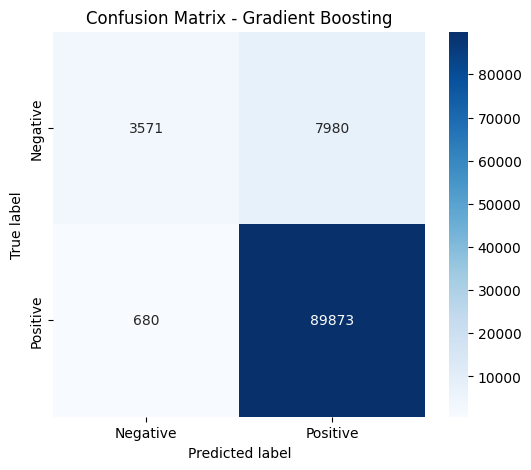


Classification report - Gradient Boosting:

              precision    recall  f1-score   support

    Negative       0.84      0.31      0.45     11551
    Positive       0.92      0.99      0.95     90553

    accuracy                           0.92    102104
   macro avg       0.88      0.65      0.70    102104
weighted avg       0.91      0.92      0.90    102104



In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Logistic Regression model with the optimal C value identified earlier
lr_tfidf = LogisticRegression(C=optimal_C, max_iter=1000, random_state=42)
lr_tfidf.fit(X_train_tfidf, Y_train)

models = {
    'Logistic Regression (TF-IDF)': lr_tfidf,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

for name, model in models.items():
    # Use TF-IDF transformed data for Logistic Regression, and CountVectorizer transformed data for others
    X_test_data = X_test_tfidf if 'Logistic' in name else X_test

    y_pred = model.predict(X_test_data)
    cm = confusion_matrix(Y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    print(f"\nClassification report - {name}:\n")
    print(classification_report(Y_test, y_pred, target_names=['Negative', 'Positive']))


## Classification Results - Model Comparison

Here are the performance metrics for the four classifiers on the test dataset:

| Model                          | Accuracy | Precision (Negative / Positive) | Recall (Negative / Positive) | F1-score (Negative / Positive) |
|--------------------------------|---------|--------------------------------|------------------------------|--------------------------------|
| Logistic Regression (TF-IDF)   | 0.95    | 0.81 / 0.96                    | 0.69 / 0.98                  | 0.75 / 0.97                    |
| Decision Tree                  | 0.90    | 0.68 / 0.91                    | 0.27 / 0.98                  | 0.39 / 0.95                    |
| Random Forest                  | 0.89    | 0.00 / 0.89                    | 0.00 / 1.00                  | 0.00 / 0.94                    |
| Gradient Boosting               | 0.92    | 0.84 / 0.92                    | 0.31 / 0.99                  | 0.46 / 0.95                    |

**Notes:**
- Logistic Regression achieves the highest overall accuracy and balanced performance across classes.
- Decision Tree and Gradient Boosting perform well for positive reviews but struggle with negative reviews.
- Random Forest predicts almost all samples as positive, leading to 0 precision/recall for the negative class.
- Weighted averages reflect the class imbalance in the dataset.


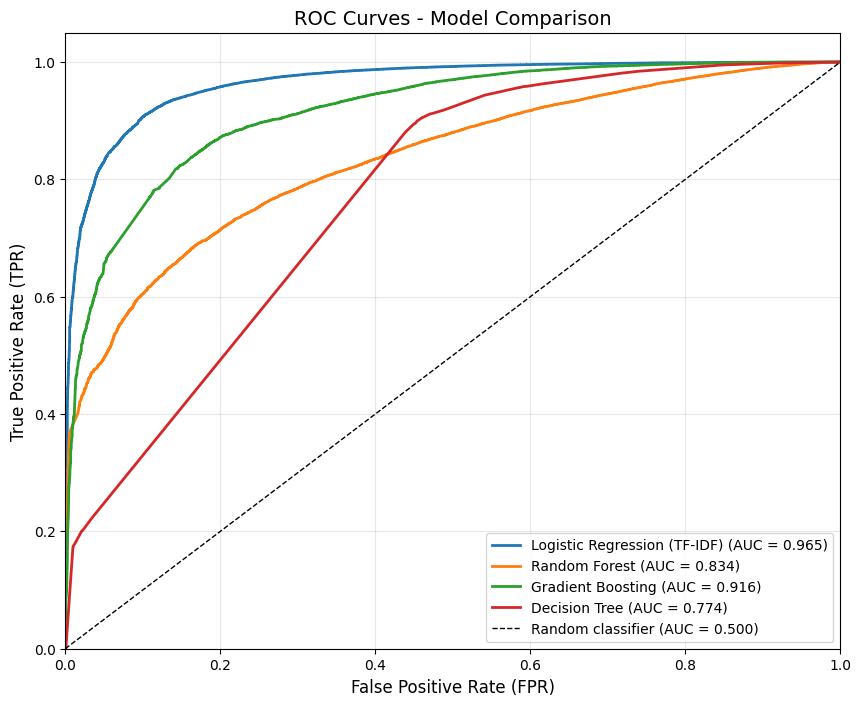


AUC (Area Under the Curve) - the higher, the better the model
Ideal value: 1.0, Random classifier: 0.5


In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

models_for_roc = [
    ('Logistic Regression (TF-IDF)', lr_tfidf, X_test_tfidf),
    ('Random Forest', rf_model, X_test),
    ('Gradient Boosting', gb_model, X_test),
    ('Decision Tree', dt_model, X_test)
]

for name, model, X_test_data in models_for_roc:
    y_proba = model.predict_proba(X_test_data)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print("\nAUC (Area Under the Curve) - the higher, the better the model")
print("Ideal value: 1.0, Random classifier: 0.5")

---

## ROC-AUC Analysis

| Model | AUC Score | Interpretation |
|-------|-----------|----------------|
| **Logistic Regression** | **0.96** | Excellent discrimination |
| Gradient Boosting | 0.91 | Very good |
| Random Forest | 0.80 | Good |
| Decision Tree | 0.77 | Fair |
| Random Classifier | 0.50 | No discrimination (baseline) |

**Key Insight**: Logistic Regression significantly outperforms other models with AUC = 0.96, indicating excellent ability to distinguish between positive and negative reviews.

---


---

## Model Performance Summary

| Model | Accuracy | AUC-ROC | Negative F1 | Positive F1 | Trade-off |
|-------|----------|---------|-------------|-------------|-----------|
| **Logistic Regression (TF-IDF)** | **94%** | **0.96** | **0.74** | 0.97 | **Best overall balance** |
| Gradient Boosting | 91% | 0.91 | 0.44 | 0.95 | High precision, low recall |
| Decision Tree | 90% | 0.77 | 0.38 | 0.95 | Poor negative detection |
| Random Forest | 76% | 0.80 | 0.37 | 0.85 | Over-corrected for imbalance |
| Random Classifier | 50% | 0.50 | - | - | Baseline |

---

## Detailed Classification Reports

### 1st Logistic Regression (TF-IDF) - **WINNER**

**Strengths**:
- Highest accuracy (94%) and AUC (0.96)
- Best F1-score for negative class (0.74)
- Good balance between precision and recall

---

### 2nd Gradient Boosting

**Strengths**:
- Highest negative precision (0.84) - when it predicts negative, it's usually right
- Very high positive recall (0.99)

**Weaknesses**:
- Only catches 29% of negative reviews (low recall)

---

### 3rd Decision Tree

**Weaknesses**:
- Poor negative class detection (F1 = 0.38)
- Only 27% recall for negative reviews
- Tends to overfit to positive class

---

### Random Forest (with class_weight='balanced')

**Issues**:
- Over-corrected for class imbalance
- Poor negative precision (0.27) - many false positives
- Lowest overall accuracy (76%)

---
